<a href="https://colab.research.google.com/github/MPrithvi12/DataScience/blob/main/FRAUD_DETECTION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING LIBRARIES**#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#**loading the dataset to a Pandas Dataframe**#

In [2]:
credit_card_data = pd.read_csv('/content/CreditCardData.csv')
#first five rows
credit_card_data.head(5)

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,3577 209,14-Oct-20,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,2694 780,14-Oct-20,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,2640 960,13-Oct-20,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,2771 031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


#**Data Preprocessing**#

1.   Analysing and cleaning the dataset



In [3]:
#Info of the dataset
credit_card_data.info()
#checking the number of missing values in each column
credit_card_data.isnull().sum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   float64
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Transaction ID   Date  Day of Week   Time  Type of Card  Entry Mode  \
0               False  False        False  False         False       False   
1               False  False        False  False         False       False   
2               False  False        False  False         False       False   
3               False  False        False  False         False       False   
4               False  False        False  False         False       False   
...               ...    ...          ...    ...           ...         ...   
99995           False  False        False  False         False       False   
99996           False  False        False  False         False       False   
99997           False  False        False  False         False       False   
99998           False  False        False  False         False       False   
99999           False  False        False  False         False       False   

 

In [4]:
#Removing rows with missing values
credit_card_data.dropna(inplace=True)
credit_card_data['Age'] = credit_card_data['Age'].astype(int)

In [5]:
#Encode Categorical Variables using one-hot encoding
credit_card_data =pd.get_dummies(credit_card_data, columns=['Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group',
                                     'Country of Transaction', 'Shipping Address', 'Country of Residence', 'Gender', 'Bank'])

In [6]:
credit_card_data.describe()

,Time,Amount,Age,Fraud,Day of Week_Friday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Type of Card_MasterCard,Type of Card_Visa,...,Gender_F,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
count,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,...,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000
mean,14.563100,112.579933,44.544895,0.071937,0.000140,0.000120,0.497965,0.501775,0.461876,0.538124,...,0.491223,0.508777,0.299359,0.099913,0.099563,0.099863,0.099653,0.100133,0.101043,0.100473
std,5.308202,123.435613,9.950023,0.258384,0.011833,0.010955,0.499998,0.499999,0.498547,0.498547,...,0.499925,0.499925,0.457980,0.299885,0.299418,0.299819,0.299538,0.300179,0.301387,0.300631
min,0.000000,5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,17.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,30.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,208.000000,51.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,400.000000,86.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The average time is 14.54 Hrs.
The average  amount is £112.33.
The average age is 44.5 Years.
The percentage of fraud is 72% .

* The average amount of a non-fraudulent transaction is much higher than the average amount of a fraudulent transaction. This is something that we will need to keep in mind when we build our machine learning model.


In [7]:
#Check Duplicated Values
credit_card_data.duplicated().sum()

0

In [8]:
credit_card_data.head(5)

,Transaction ID,Date,Time,Amount,Age,Fraud,Day of Week_Friday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,...,Gender_F,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
0,3577 209,14-Oct-20,19,5.0,25,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,3039 221,14-Oct-20,17,288.0,49,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2694 780,14-Oct-20,14,5.0,42,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
3,2640 960,13-Oct-20,14,28.0,51,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
4,2771 031,13-Oct-20,23,91.0,38,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [9]:
credit_card_data['Fraud'].value_counts()

0    92785
1     7192
Name: Fraud, dtype: int64

#**EDA**#

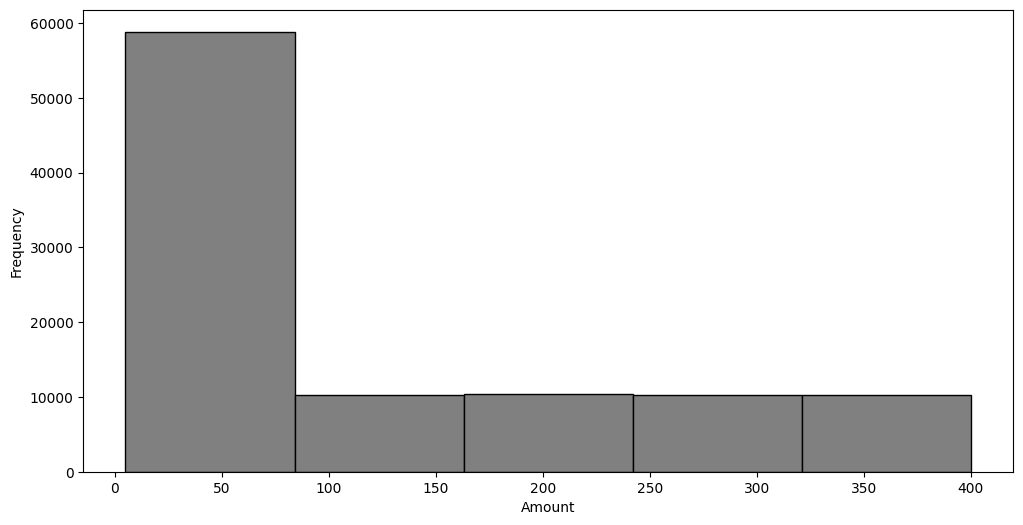

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature=['Amount']

for i in feature:
    plt.xlabel(i)
    credit_card_data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

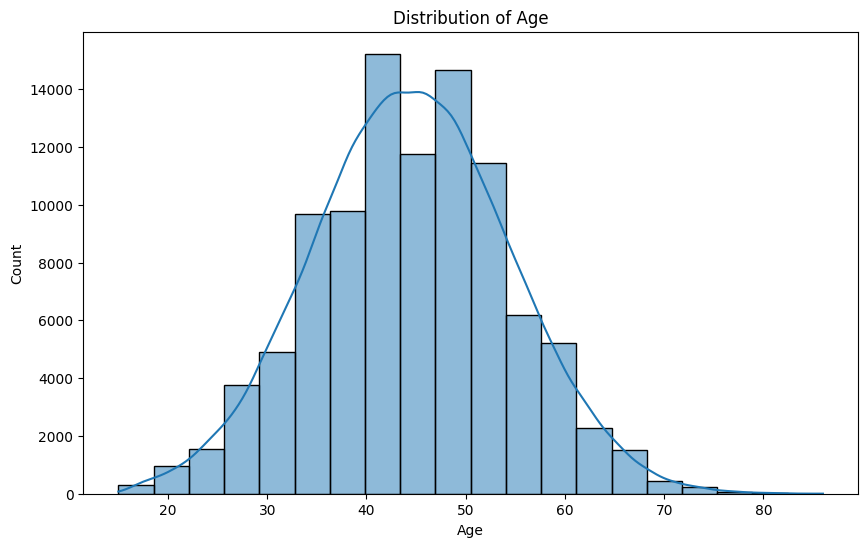

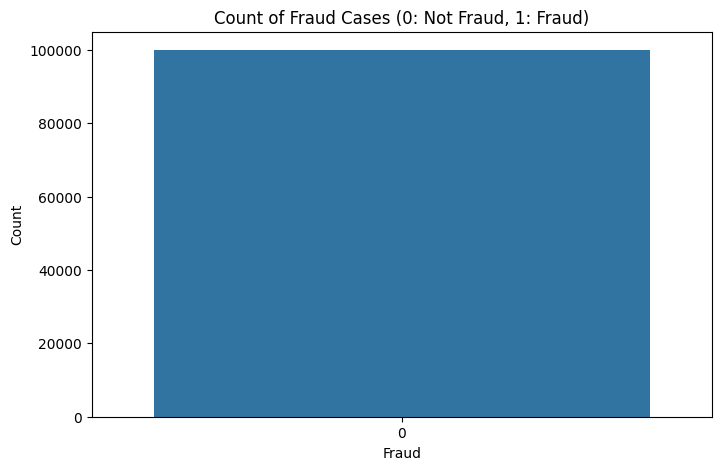

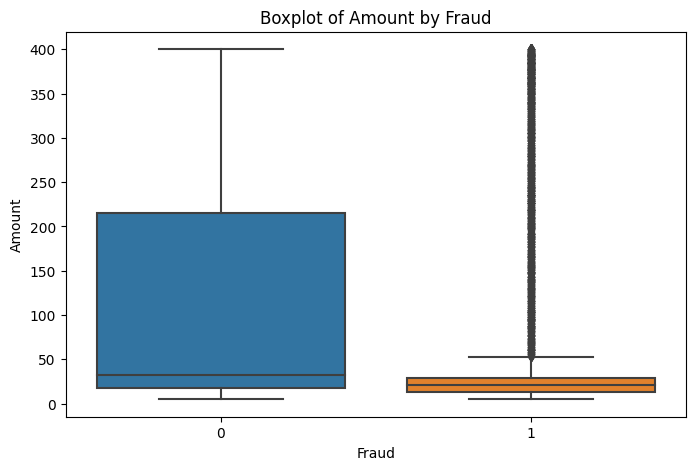

In [11]:
%matplotlib inline
#Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# Example 2: Countplot of Fraud Cases
plt.figure(figsize=(8, 5))
sns.countplot(credit_card_data['Fraud'])
plt.title('Count of Fraud Cases (0: Not Fraud, 1: Fraud)')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()
# Example 3: Boxplot of Amount by Fraud
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fraud', y='Amount', data=credit_card_data)
plt.title('Boxplot of Amount by Fraud')
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.show()

In [32]:
feature=['Amount']

for i in feature:
    lower = credit_card_data[i].quantile(0.10)
    upper = credit_card_data[i].quantile(0.90)
    credit_card_data[i] = np.where(credit_card_data[i] <lower, lower,credit_card_data[i])
    credit_card_data[i] = np.where(credit_card_data[i] >upper, upper,credit_card_data[i])
    print('Feature: ',i)
    print('Skewness value: ',credit_card_data[i].skew())
    print('\n')

Feature:  Amount
Skewness value:  0.8127094426870671




In [12]:
total_transactions = credit_card_data.shape[0]
print('The total transaction is : \n', total_transactions)
fraud_transaction = credit_card_data[credit_card_data.Fraud==1].shape[0]
print('Total Fraud Transaction : \n',fraud_transaction)
fraud_percent= fraud_transaction/total_transactions * 100
print('Percentage of Fraud Transactions : \n',fraud_percent)

The total transaction is : 
 99977
Total Fraud Transaction : 
 7192
Percentage of Fraud Transactions : 
 7.193654540544325


This shows that our dataset is imbalanced.

In [107]:
fraud_amount= credit_card_data[credit_card_data.Fraud==1]
fraud_amount=fraud_amount.sort_values(by=['Amount'],ascending=False)
fraud_amount.head()

,Transaction ID,Date,Time,Amount,Age,Fraud,Day of Week_Friday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,...,Gender_F,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
68015,3105 460,13-Oct-20,14,323.0,60,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
54357,2932 792,13-Oct-20,16,323.0,29,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
8846,3054 783,13-Oct-20,14,323.0,52,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
8901,3625 113,14-Oct-20,4,323.0,24,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
83228,3586 766,14-Oct-20,8,323.0,55,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0


<Axes: ylabel='Frequency'>

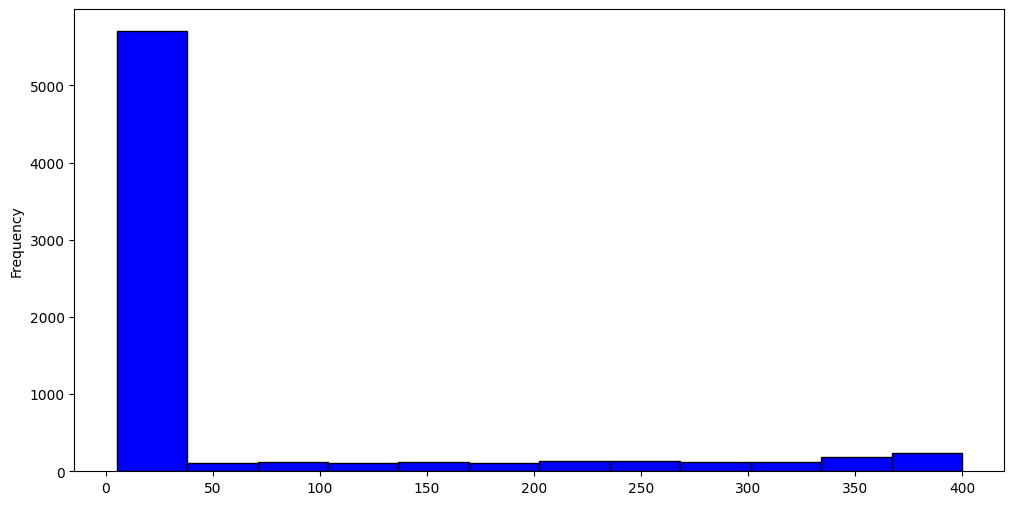

In [93]:
fraud_amount.Amount.plot(kind='hist', bins=12, figsize=(12,6), facecolor='blue',edgecolor='black')

# **Under-Sampling**

#**This dataset is highly unbalanced**#
#**0 >- Normal Transaction**#
#**1 >- Fraudulent Transaction**#

In [114]:
legit = credit_card_data[credit_card_data.Fraud==0]
fraud = credit_card_data[credit_card_data.Fraud==1]
print(legit.shape)
print(fraud.shape)

(92785, 53)
(7192, 53)


In [115]:
#statistical measures of the data
legit.Amount.describe()

count    92785.000000
mean       112.715191
std        116.168819
min         10.000000
25%         18.000000
50%         32.000000
75%        215.000000
max        323.000000
Name: Amount, dtype: float64

In [116]:
credit_card_data.groupby('Fraud').mean()

<ipython-input-116-d7130a6e60fe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  credit_card_data.groupby('Fraud').mean()


,Time,Amount,Age,Day of Week_Friday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_CVC,...,Gender_F,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
Fraud,,,,,,,,,,,,,,,,,,,,,
0,14.986183,112.715191,44.552697,0.000140,0.000108,0.496352,0.503400,0.466713,0.533287,0.326249,...,0.497839,0.502161,0.297850,0.100221,0.100242,0.100296,0.099908,0.099219,0.101029,0.101234
1,9.104839,61.531007,44.444244,0.000139,0.000278,0.518771,0.480812,0.399472,0.600528,0.444800,...,0.405868,0.594132,0.318826,0.095940,0.090795,0.094271,0.096357,0.111930,0.101224,0.090656


Build a sample dataset containg similar distribution of normal transactions and Fraudulent Transactions.

Number of Fraudulent Transaction --> 7192

In [117]:
legit_sample =legit.sample(n=7192)

Concatenating two DataFrames

In [119]:
new_dataset = pd.concat([legit_sample, fraud],axis=0)
new_dataset.head(5)

,Transaction ID,Date,Time,Amount,Age,Fraud,Day of Week_Friday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,...,Gender_F,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
40333,2623 777,14-Oct-20,7,29.0,58,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
89836,2915 545,13-Oct-20,12,86.0,34,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
51672,3584 819,13-Oct-20,8,202.0,23,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
46009,3639 651,13-Oct-20,17,152.0,53,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
83481,2946 506,14-Oct-20,10,10.0,40,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [120]:
new_dataset['Fraud'].value_counts()

0    7192
1    7192
Name: Fraud, dtype: int64

In [122]:
new_dataset.groupby('Fraud').mean()

<ipython-input-122-bedce28de9a8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_dataset.groupby('Fraud').mean()


,Time,Amount,Age,Day of Week_Friday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_CVC,...,Gender_F,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
Fraud,,,,,,,,,,,,,,,,,,,,,
0,14.916713,111.746107,44.747636,0.000000,0.000139,0.494994,0.504867,0.465517,0.534483,0.331479,...,0.497775,0.502225,0.303115,0.103587,0.096079,0.098721,0.099833,0.096218,0.102614,0.099833
1,9.104839,61.531007,44.444244,0.000139,0.000278,0.518771,0.480812,0.399472,0.600528,0.444800,...,0.405868,0.594132,0.318826,0.095940,0.090795,0.094271,0.096357,0.111930,0.101224,0.090656


Splitting the dataset into Features and Targets

In [123]:
X= new_dataset.drop(columns='Fraud',axis=1)
Y= new_dataset['Fraud']

In [124]:
print(X)
print(Y)

      Transaction ID       Date  Time  Amount  Age  Day of Week_Friday  \
40333       2623 777  14-Oct-20     7    29.0   58                   0   
89836       2915 545  13-Oct-20    12    86.0   34                   0   
51672       3584 819  13-Oct-20     8   202.0   23                   0   
46009       3639 651  13-Oct-20    17   152.0   53                   0   
83481       2946 506  14-Oct-20    10    10.0   40                   0   
...              ...        ...   ...     ...  ...                 ...   
99949       3602 464  14-Oct-20     1    30.0   33                   0   
99954       3257 939  13-Oct-20    12   323.0   56                   0   
99969       3249 369  13-Oct-20    18    21.0   50                   0   
99974       2596 607  13-Oct-20     9   211.0   44                   0   
99993       2816 417  13-Oct-20    17    25.0   35                   0   

       Day of Week_Thursday  Day of Week_Tuesday  Day of Week_Wednesday  \
40333                     0         

Split the data into Training data & Testing data

In [135]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=2)

In [136]:
print(X.shape,X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(14384, 52) (11507, 52) (2877, 52)
(14384,) (11507,) (2877,)


#**Model Training**#


1.   Logistic Regression



In [137]:
#Initialize and fit the logistic regression model
model = LogisticRegression(random_state=2)

In [138]:
#training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

ValueError: ignored

In [141]:
#Evaluate the model
accuracy = model.score(X_test, Y_test)
conf_matrix = confusion_matrix(Y_test, Y_test)
classification_rep = classification_report(Y_test, Y_test)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

ValueError: ignored